## NAME - ***SHRUTI HOLE*** 
## DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE

## **TASK 3**

# PROJECT NAME - **CAR PRICE PREDICTION WITH MACHINE LEARNING**

In [59]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [60]:
# loading the data from csv file to a pandas Dataframe
car=pd.read_csv(r"C:\Users\Sakshi\Desktop\shruti\OASIS Internship\Task-3(Car)\car data.csv")

In [3]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
print(car['Selling_type'].unique())
print(car['Fuel_Type'].unique())
print(car['Transmission'].unique())
print(car['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [5]:
car.dtypes
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car.duplicated().sum()

2

In [8]:
car.drop_duplicates(inplace=True)

In [9]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
#converting the dtype of year
car["Year"]= pd.to_datetime(car["Year"], format = '%Y').dt.year

In [11]:
car["Owner"] = car["Owner"].astype("int32")
car["Driven_kms"] = car["Driven_kms"].astype("int32")

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int32  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int32  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 19.9+ KB


In [13]:
car["Year"].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [14]:
car["Year"].nunique()

16

In [15]:
#SELECTING IMPORTANT DATA FOR MODEL BUILDING(#FEATURE SELECTION)
car = car.drop(columns= "Car_Name")

In [16]:
### ADDING AGE COLUMN OF CAR
car["current year"]= 2023

In [17]:
car['Age of car']= car["current year"]-car["Year"]

In [18]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,current year,Age of car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2023,7
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2023,8
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2023,14
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2023,6


In [19]:
car = car.drop(columns= ["current year", "Year"])
car

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age of car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


# *ENCODING*

In [20]:
car = pd.get_dummies(data=car,  drop_first= True)

In [21]:
car

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,True,False,False,True
297,4.00,5.90,60000,0,8,False,True,False,True
298,3.35,11.00,87934,0,14,False,True,False,True
299,11.50,12.50,9000,0,6,True,False,False,True


In [22]:
g= ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']
car[g]= car[g].astype('int')

In [23]:
car.head(5)

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [24]:
car.corr()

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876305,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876305,1.000000,0.205224,0.009948,0.053167,0.464934,-0.456829,-0.511779,-0.334326
Driven_kms,0.028566,0.205224,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009948,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Age of car,-0.234369,0.053167,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464934,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456829,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Selling_type_Individual,-0.553851,-0.511779,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334326,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


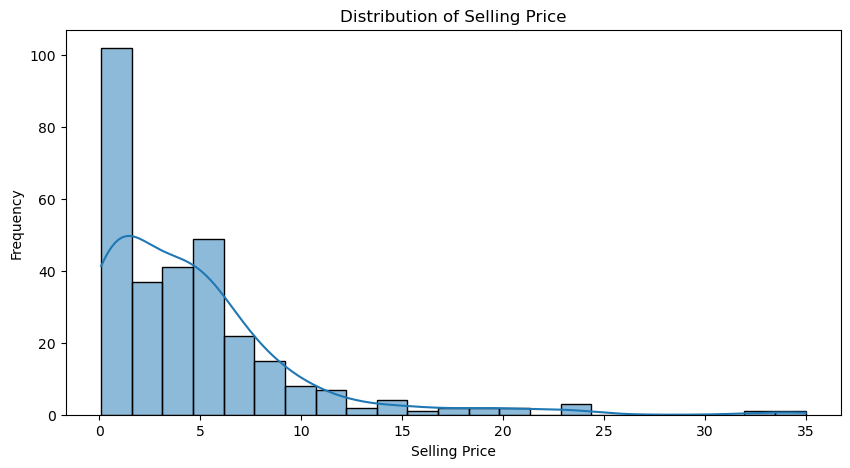

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data["Selling_Price"],kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()             

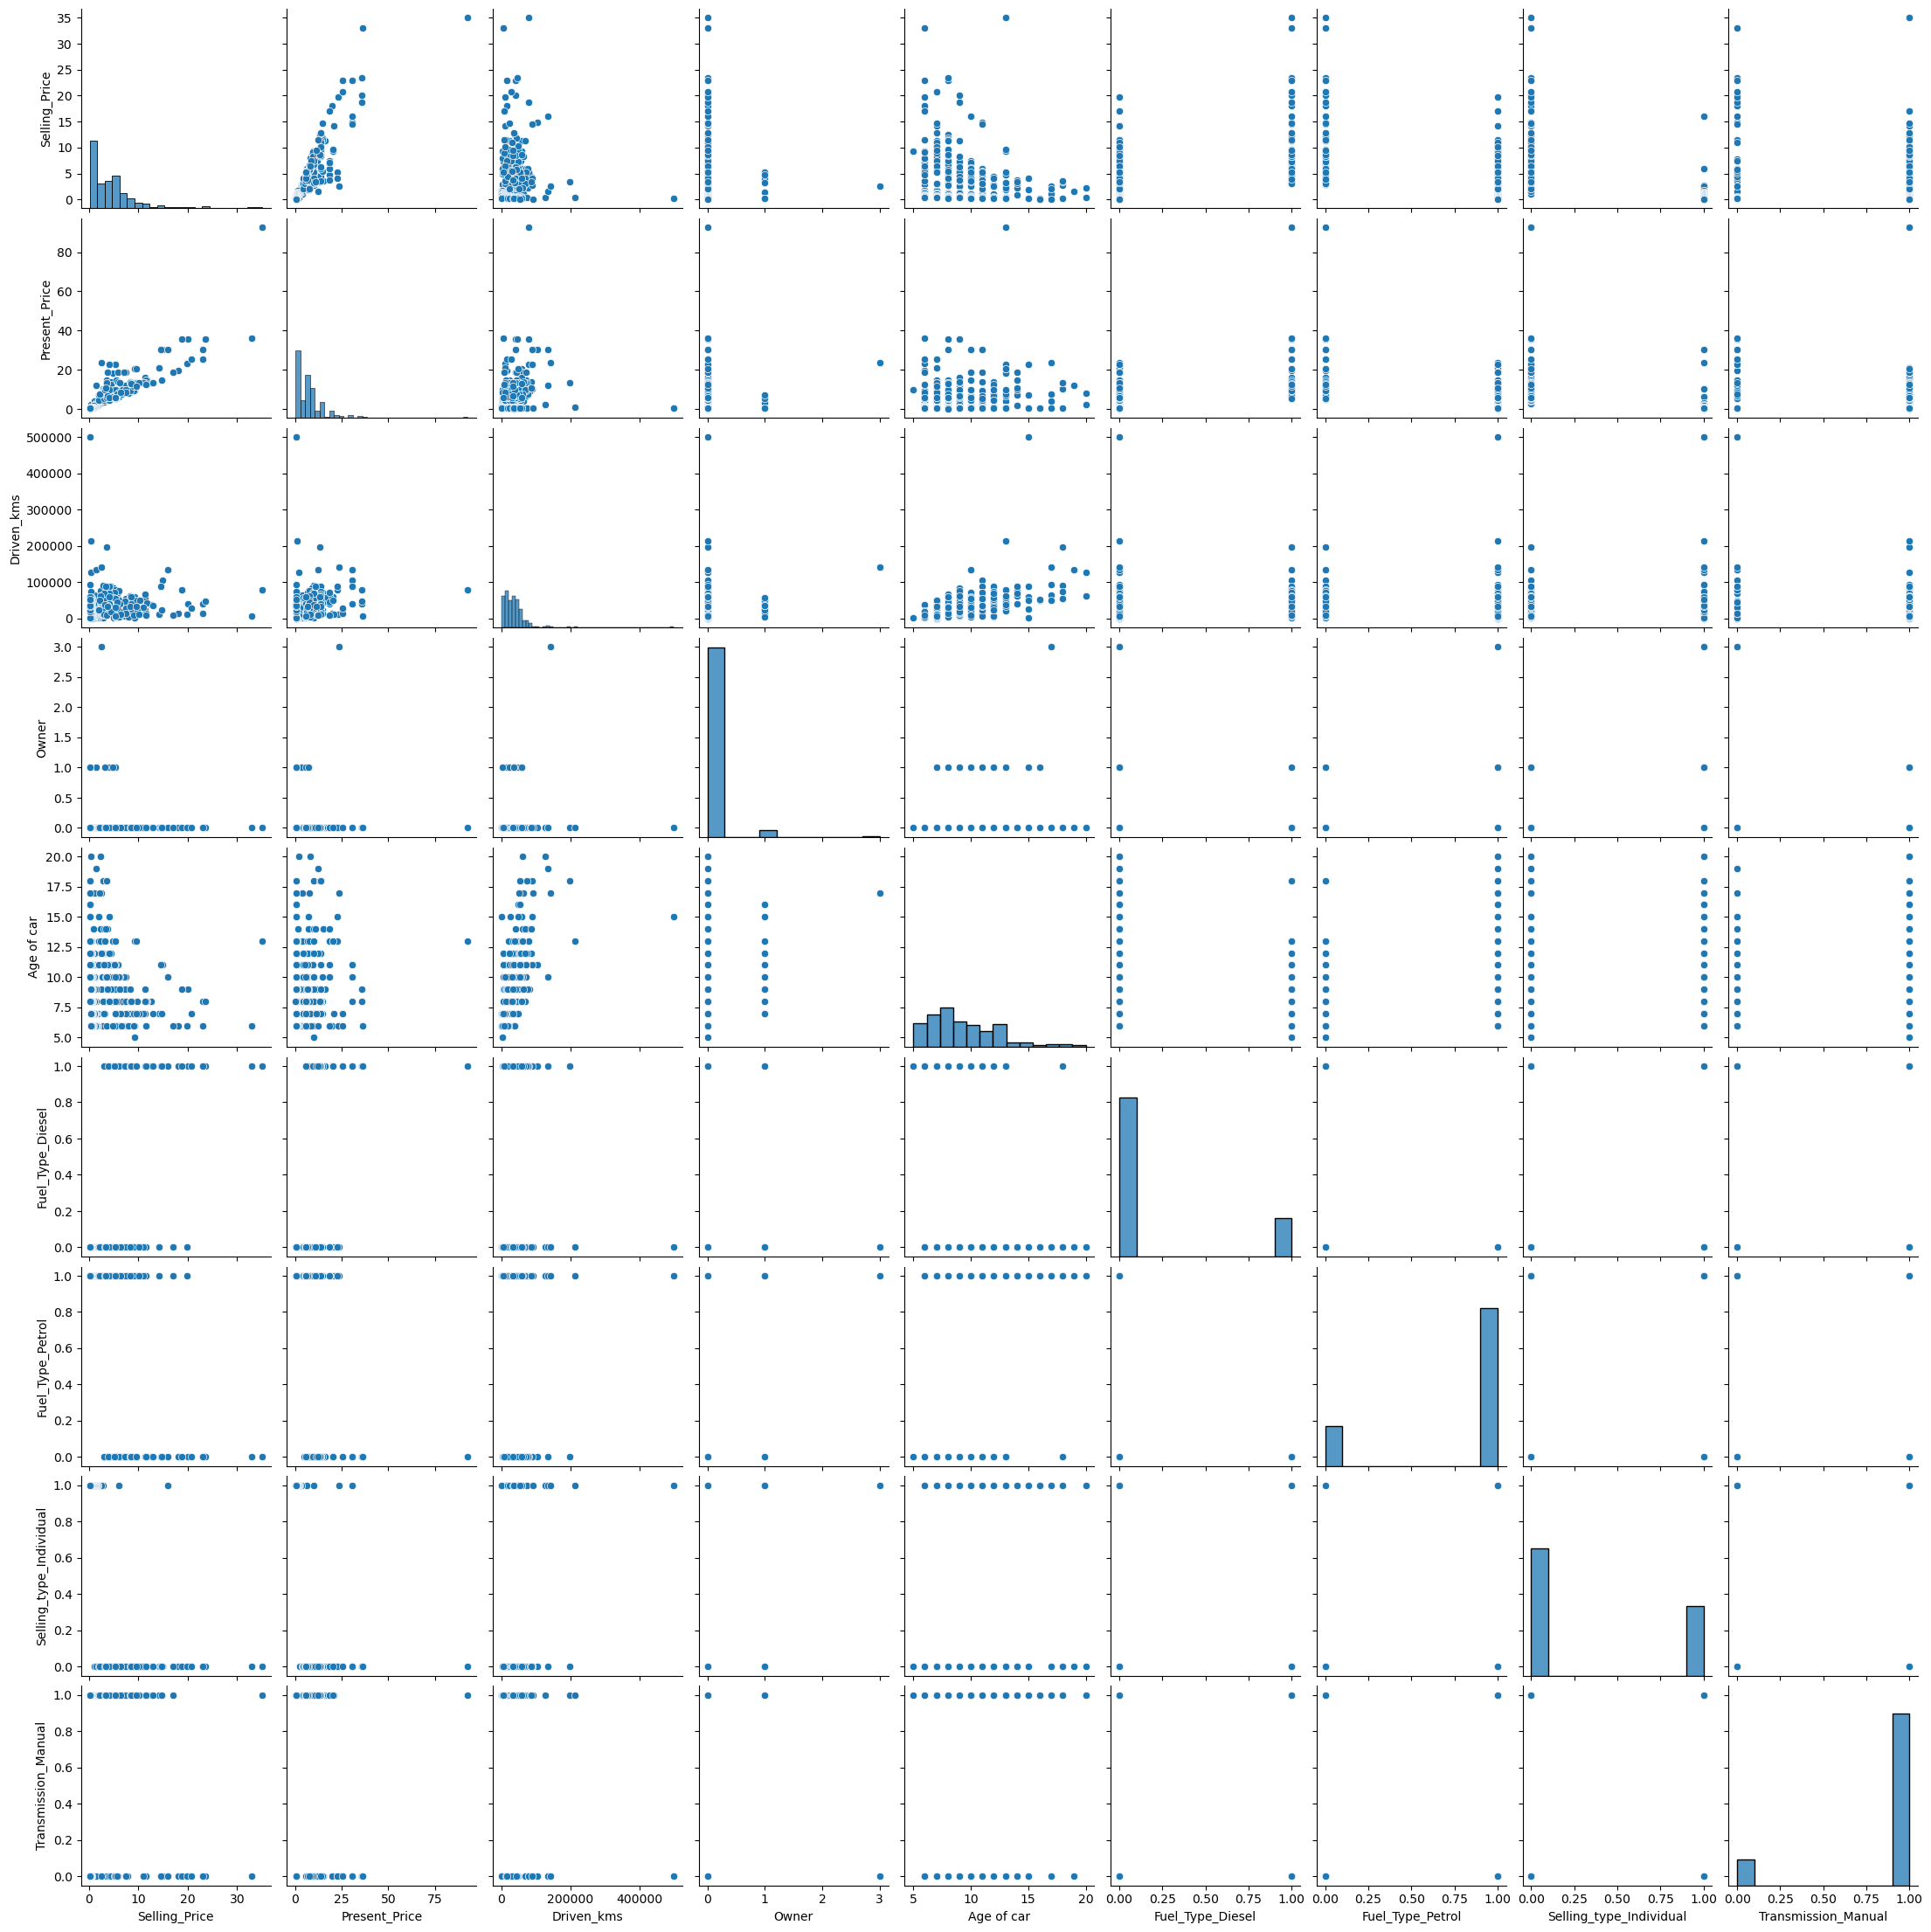

In [27]:
sns.pairplot(data)

<Axes: >

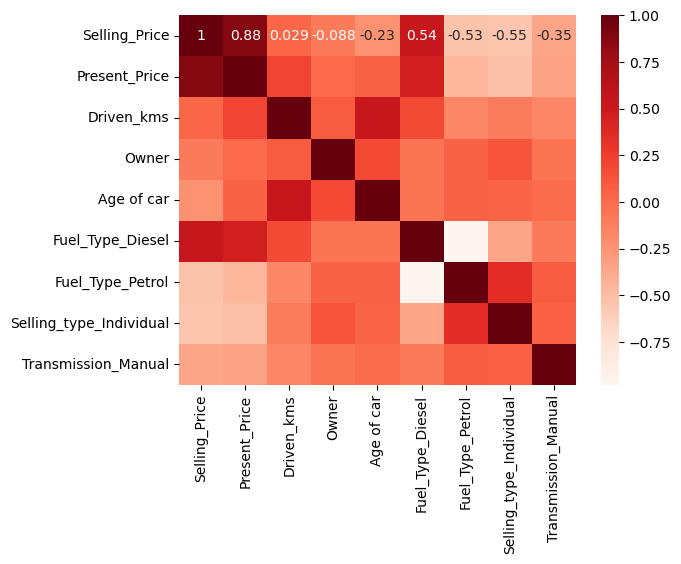

In [25]:
sns.heatmap(car.corr(), annot= True, cmap= 'Reds')

# *SPLITTING DATA*

In [27]:
y = car['Selling_Price'] #DEPENDENT VARIABLE AND TARGET
x = car.drop(columns= ['Selling_Price']) # INPUT AND INDEPENDENT DATA

In [28]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [29]:
x

,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1
297,5.90,60000,0,8,0,1,0,1
298,11.00,87934,0,14,0,1,0,1
299,12.50,9000,0,6,1,0,0,1


In [30]:
x["Owner"].unique()

array([0, 1, 3])

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [32]:
print(model.feature_importances_)

[0.454085   0.03821137 0.0008324  0.08628878 0.08010973 0.0214377
 0.22611184 0.09292318]


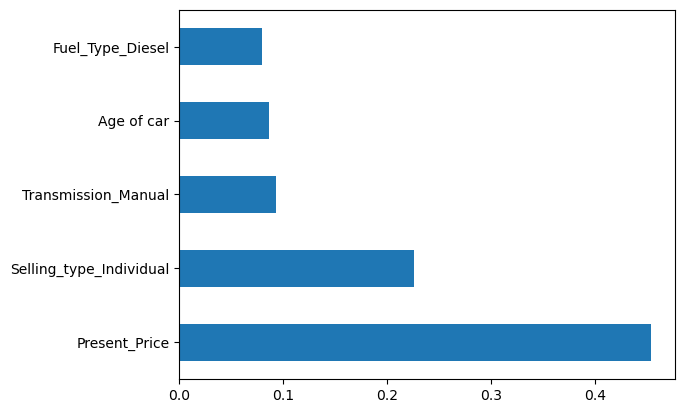

In [33]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=5)

In [35]:
x_train.shape

(239, 8)

In [36]:
x_test.shape

(60, 8)

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
y_pred=regressor.predict(x_test)
y_pred

array([ 0.2055,  8.197 ,  2.5295,  1.479 ,  4.405 , 15.8766,  4.2425,
        0.552 , 14.7149,  1.1835,  2.929 ,  0.2105, 23.0336,  3.0025,
        1.926 ,  2.4295,  4.757 , 20.0817,  7.5399,  7.3669,  6.708 ,
        1.2392, 10.5622,  4.3787,  0.6357,  5.0536,  3.2905, 21.7352,
       11.4356,  0.2661,  6.914 ,  1.0681,  2.7935,  2.509 ,  4.2331,
        4.7435,  4.33  ,  0.192 ,  4.7666,  0.4528,  5.7015,  6.5885,
       15.0317,  3.7245,  5.3298,  1.058 ,  1.57  ,  6.1631,  5.1675,
        9.143 ,  4.5205, 13.1515,  6.5521,  7.5419,  0.814 ,  1.1842,
        2.9215,  7.242 ,  2.4985,  0.5796])

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test,y_pred)

0.895469343434294

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],  # Use valid criterion values
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [43]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [44]:
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=parameters, n_iter=10, 
                               scoring ='neg_mean_absolute_error',random_state=42, cv=5, verbose=2, n_jobs=-1)

In [45]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [46]:
random_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'poisson'}

In [47]:
random_cv.best_score_

-0.7662769410429316

In [48]:
predictions=random_cv.predict(x_test)

<Axes: xlabel='Selling_Price', ylabel='Density'>

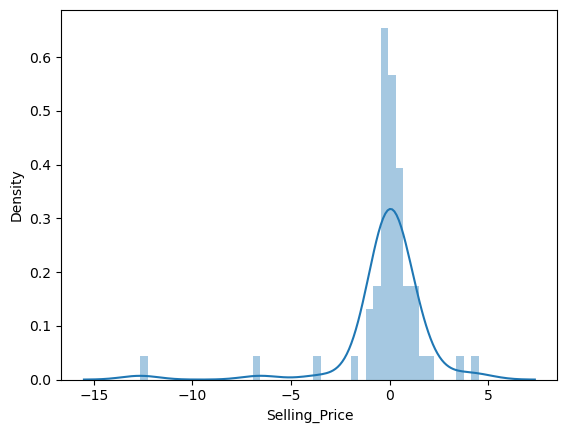

In [49]:
sns.distplot(y_test-predictions)

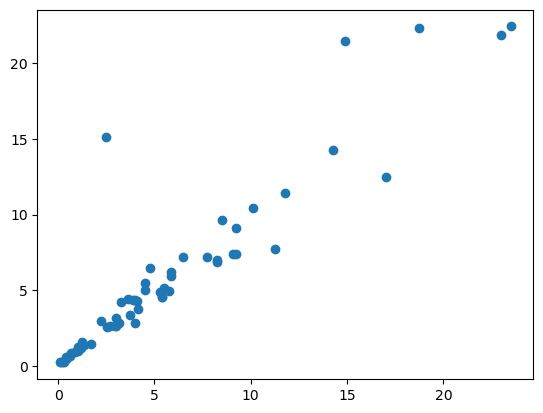

In [50]:
plt.scatter(y_test, predictions)

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9667330709100415
MSE: 4.581967475186013
RMSE: 2.1405530769373633


In [53]:
### predicting a singe observation
x.head(3)

,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1


In [55]:
single_ob = np.array([9.5, 15000, 0.0, 5.0, 1.0, 0.0, 0.0, 1.0])
single_ob = single_ob.reshape(1, -1)

In [56]:
regressor.predict(single_ob)

array([8.475])

In [57]:
car.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
